Practicing and performing Model Development on our Automobile Data set. You can find the "Automobile Data Set" from the following link: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv

Throughout this project I followed the steps I learned from an online course on Python found named Analyzing Data using Python on edX website

In this section, we will develop several models that will predict 
the price of the car using the variables or features. This is just 
an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module

Do I know if the dealer is offering fair value for my trade-in?

Do I know if I put a fair value on my car?

Model Development

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#This dataset was hosted on IBM Cloud object
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.00,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.00,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.00,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.00,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.00,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.50,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.50,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.50,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.30,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.80,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


1. LINEAR REGRESSION 

In [7]:
#Linear Function 
# Yhat = a + bX

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

How could Highway-mpg help us predict car price?

In [12]:
X = df[['highway-mpg']]
Y = df['price']

In [13]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [21]:
Yhat[20]

4732.237346958449

In [22]:
#Value of intercept (a)
lm.intercept_

38423.305858157386

In [23]:
#Value of slope (b)
lm.coef_

array([-821.73337832])

Final estimated linear model

Price = 38431.31 - 821.73 * Highway-mpg

In [25]:
#Creating a linear regression model
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
#Train the model using 'engine-size' as the independent variable
#and 'price' as the dependent variable?
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
#Finding the intercept of the model
lm1.intercept_

array([-7963.33890628])

In [30]:
#Finding the slope 
lm1.coef_

array([[166.86001569]])

Linear equation of the predicted line

Yhat = -7963.34 + 166.86*X

Or

Price = -7963.34 + 166.86*engine-size

In [33]:
df[['engine-size']].head()

,engine-size
0,130
1,130
2,152
3,109
4,136


In [35]:
Yhat = lm1.predict(df[['engine-size']])
Yhat[120]

array([12393.58300807])

MULTIPLE LINEAR REGRESSION

Yhat = a + b1X1 + b2X2 + b3X3.....

From the previous section we know that other good predictors of price could be:

Horsepower,
Curb-weight,
Engine-size,
Highway-mpg

In [39]:
Z = df[['horsepower','curb-weight', 'engine-size','highway-mpg']]

In [40]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
#Value of intercept(a)?
lm.intercept_

-15806.624626329198

In [42]:
#value of coefficients (b1,b2,b3,b4)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

So we get

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

Creatin and training a MLR model lm2 where the response
variable if price and the predictor variable is 
'normalized-losses' and 'highway=mpg'

In [45]:


Z1 = df[['normalized-losses','highway-mpg']]

In [47]:
lm1.fit(Z1, df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
#Value of intercept?
lm1.intercept_

array([38201.31327246])

In [49]:
#Value of Slope?
lm1.coef_

array([[   1.49789586, -820.45434016]])

So we get
Price = 38201.31 + 1.49 X normalized-losses - 820.45 X highway-mpg

Model evaluation using Visualization

In [52]:
import seaborn as sns
%matplotlib inline

1. Regression Plot

When it comes to simple linear regression, an excellent way to 
visualize the fit of our model is by using regression plots.

(0, 48281.61581716212)

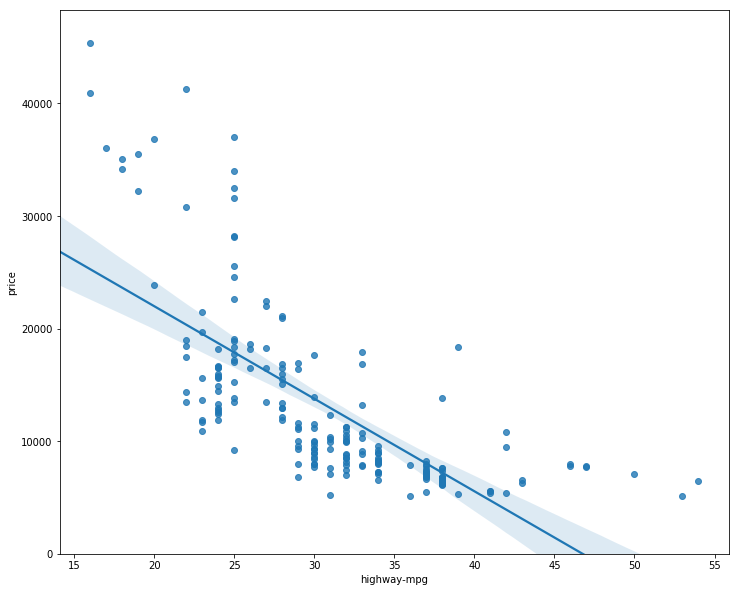

In [55]:
#Let's visualize Highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative

Lets compare this plot to the regression plot of "peak-rpm".

(0, 47422.919330307624)

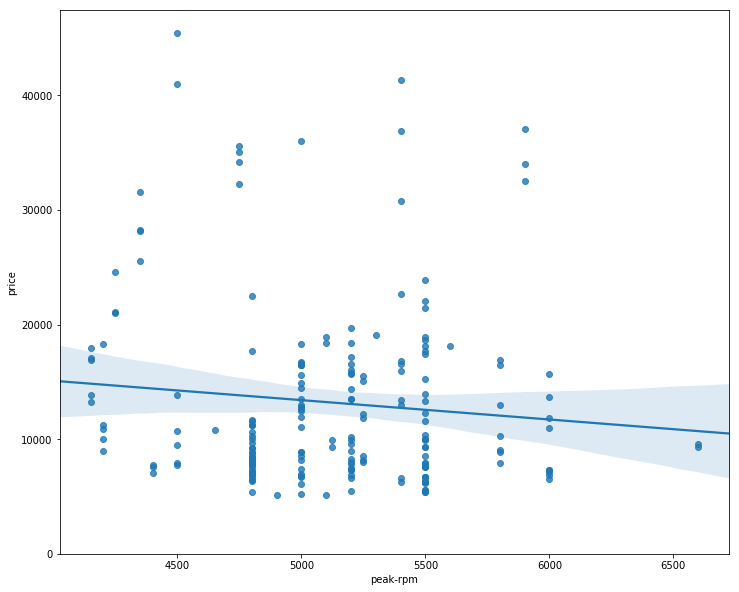

In [57]:
plt.figure(figsize= (width, height))
sns.regplot(x='peak-rpm',y='price',data =df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see 
that the points for "highway-mpg" are much closer to the generated 
line and on the average decrease. The points for "peak-rpm" have 
more spread around the predicted line, and it is much harder to determine 
if the points are decreasing or increasing as the "peak-rpm" increases.

In [60]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


We see from the above correlation data that highway-mpg
is  more correlated to price than peak-rpm to the price

RESIDUAL PLOT

A good way to visualize the variance of the data is to use a 
residual plot.

Residual is the difference between the observed value (y) and
the predicted value (yhat).

A residual plot is a graph that shows the residuals on the vertical 
y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals:
If the points in a residual plot are randomly spread out around the 
x-axis, then a linear model is appropriate for the data. 

Why is that? 
Randomly spread out residuals means that the variance is constant, and 
thus the linear model is a good fit for this data.

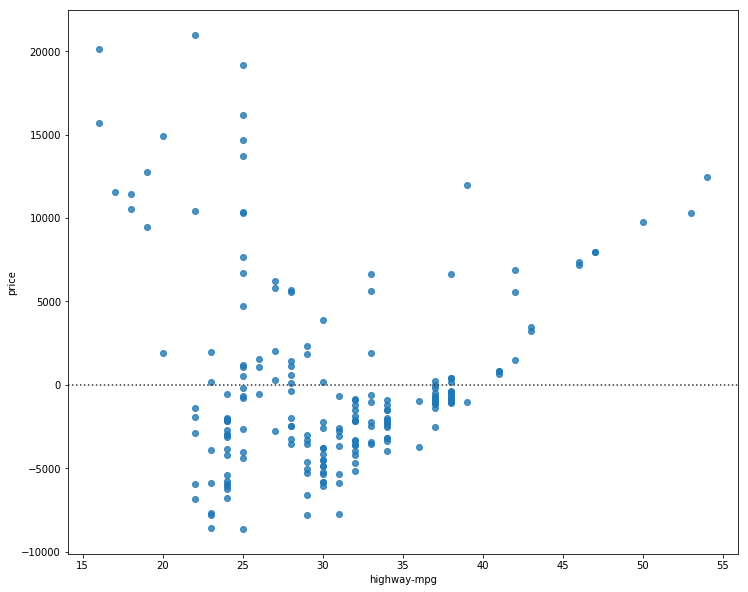

In [66]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not 
randomly spread around the x-axis, which leads us to believe 
that maybe a non-linear model is more appropriate for this data.

MULTIPLE LINEAR REGRESSION

We can look at the distribution of the fitted values
that result from the model and compare it to the distribution 
of the actual values.

In [70]:
#Lets make a prediction

In [71]:
Y_hat = lm.predict(Z)

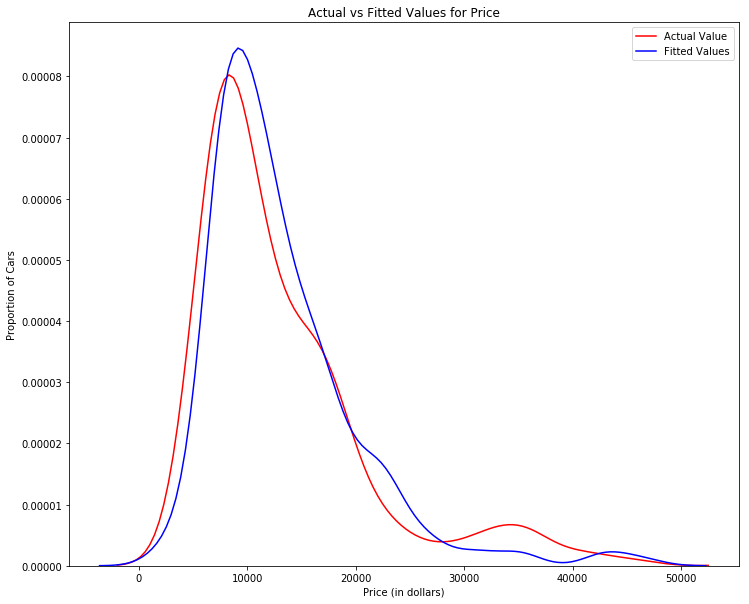

In [72]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color ="r", label = "Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there 
is definitely some room for improvement.

POLYNOMIAL REGRESSION AND PIPELINES

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

We saw earlier that a linear model did not provide the best fit while using
highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial
model to the data instead.

In [77]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax= plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [78]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [80]:
#Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


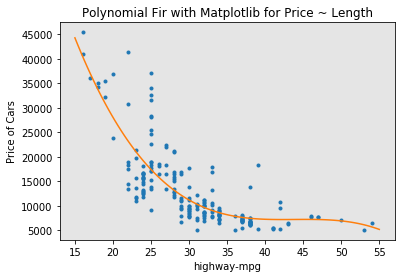

In [81]:
#plotting the function
PlotPolly(p , x, y, 'highway-mpg')

In [82]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model
performs better than the linear model. This is because the 
generated polynomial function "hits" more of the data points.

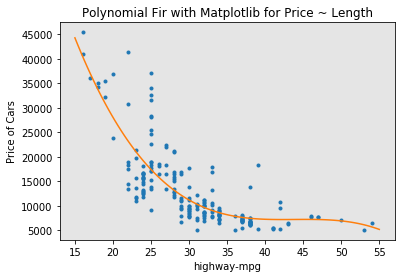

In [84]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f)
PlotPolly(p1 , x, y, 'highway-mpg')

The analytical expression for Multivariate Polynomial function gets complicated.

We can perform a polynomial transform on multiple features. First, we import the module:

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
#We create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree=2)
pr 

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [88]:
Z_pr= pr.fit_transform(Z)

In [89]:
#Original Data
Z.shape

(201, 4)

In [90]:
#data after transformation
Z_pr.shape

(201, 15)

PIPELINE


Data Pipelines simplify the steps of processing the data. We use the module 
Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Now, We create the pipeline, by creating a list of tuples including the name
of the model or estimator and its corresponding constructor.

In [96]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias= False)), ('model', LinearRegression())]

In [97]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [98]:
pipe.fit(Z,y)

C:\Users\adeshmukh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\adeshmukh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [99]:
ypipe=pipe.predict(Z)
ypipe[0:4]

C:\Users\adeshmukh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [100]:
#Creating a pipeline that Standardizes the data, then perform 
#prediction using a linear regression model using the features 
#Z and targets y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]


C:\Users\adeshmukh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\adeshmukh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\adeshmukh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

MEASURES OF IN-SAMPLE EVALUATION

Two very important measures that are often used in Statistics 
to determine the accuracy of a model are:
1. R-squared
2. Mean Squared Error (MSE)

R squared, also known as the coefficient of determination, is 
a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response 
variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, 
that is, the difference between actual value (y) and the estimated value (ŷ).


Model 1: Simple Linear Regression


In [105]:
#Let's calculate the R=squared
#highway_mpg_fit
lm.fit(X,Y)
#find the R^2
print("The R-square is:", lm.score(X,Y))

The R-square is: 0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [107]:
Yhat = lm.predict(X)
print('The output of the first four predicted value is:', Yhat[0:4])

The output of the first four predicted value is: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


Model 2: Multiple Linear Regression

In [110]:
#lets calculate R^2
lm.fit(Z,df['price'])
#find the R^2
print('The R-squared is:', lm.score(Z, df['price']))

The R-squared is: 0.8093562806577457


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate MSE


In [111]:
Y_predict_multifit = lm.predict(Z)

In [112]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

Let's calculate the R^2

let’s import the function r2_score from the module metrics as we are using a different function

In [113]:
from sklearn.metrics import r2_score

In [114]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

MSE 

In [115]:
mean_squared_error(df['price'], p(x))

20474146.42636125

Predictio and Decision Making

Previously, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [116]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [118]:
new_input = np.arange(1,100,1).reshape(-1,1)

In [119]:
#Fiting the model
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
#Producing a prediction
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

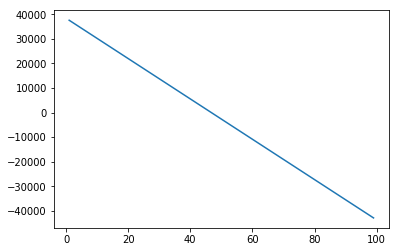

In [121]:
plt.plot(new_input, yhat)
plt.show()

Decisino Making: Determining a good model fit

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7
Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.

So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

Simple Linear Model (SLR) vs Polynomial Fit
MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
R-squared: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

Multiple Linear Regression (MLR) vs Polynomial Fit
MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.
Conclusion:
Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.